Wei Lien Huang 40128391


In [32]:
from scipy.io import arff
import pandas as pd
import os                        # for os.path.exists
import json                      # for loading metadata
import urllib                    # for downloading remote files 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import sklearn.tree
import sklearn.metrics
import sklearn.ensemble
import sklearn.preprocessing
import sklearn.gaussian_process
import sklearn.neural_network
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [33]:
def separateData(X,y):
    X_trn, X_tst, y_trn, y_tst = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
    return X_trn, X_tst, y_trn, y_tst

def readArff(dir):
    data = arff.loadarff(dir)
    df = pd.DataFrame(data[0])
    data_list = []
    data = np.array(df)
    X = data[:,0:-1]
    y_ = data[:,-1:]
    y_lis = []
    for ele in y_:
        ele = ele[0].decode('utf-8')
        if ele == 'T' or ele == '1':
            y_lis.append(1)
        if ele == 'F' or ele == '0':
            y_lis.append(0)
    y = np.array(y_lis).ravel().astype('int')
    return X,y

def removeRowWithMissingData(X_trn, y_trn, row):
    newArrayX = []
    newArrayy = []
    counter = 0
    for x in X_trn:
        if x[row] != '?':
            newArrayX.append(x)
            newArrayy.append(y_trn[counter])
        counter+=1
    return np.array(newArrayX), np.array(newArrayy)

def replaceMissingValueData(X_tst, row):
    newArrayX = []
    sum = 0
    counter = 0
    for x in X_tst:
        if x[row] != '?':
            sum += int(x[row])
            counter+=1
    
    #compute average for this column with missing index
    missingInputVal = int(sum / counter)
    #replace values
    for x in X_tst:
        if x[row] == '?':
            x[row] = missingInputVal
    return X_tst
encoder = LabelEncoder()

# Extract the following databases
1) [Diabetic Retinopathy ](https://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set)

2) [Default of credit card clients](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

3) [Breast Cancer Wisconsin](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

4) [Statlog (German credit data) (recommend german.doc for instructions and german-numeric for data.)](https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data))

5) [Adult](https://archive.ics.uci.edu/ml/datasets/adult)

6) [Yeast](https://archive.ics.uci.edu/ml/datasets/Yeast)

7) [Thoracic Surgery Data](https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data)

8) [Seismic-Bumps](https://archive.ics.uci.edu/ml/datasets/seismic-bumps)


# 1) Diabetic Retinopathy data

In [34]:
# loading the Diabetic Retinopathy data that is downloaded 
data = arff.loadarff('resources/messidor_features.arff')
df = pd.DataFrame(data[0])
df['Class'] = encoder.fit_transform(df['Class'])
X = df.drop('Class', axis='columns')
y = df['Class']
X_trn_diabetic, X_tst_diabetic, y_trn_diabetic, y_tst_diabetic = separateData(X,y)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,1
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,0
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,1


# 2) Default of credit card clients

In [35]:
data = pd.read_excel (r'resources/default of credit card clients.xls')
X = np.array(data)[1:,1:-1]
y = np.array(data)[1:,-1:].ravel().astype('int')
X_trn_credit, X_tst_credit, y_trn_credit, y_tst_credit = separateData(X,y)

data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


# 3) Breast Cancer Wisconsin 

- if y = 2 --> benign    we will change this value to 0

- if y = 4 --> malignant we will change this value to 1

In [36]:
data = pd.read_csv('resources/breast-cancer-wisconsin.data', header=None)
X = np.array(data)[:,0:-1]
y = np.array(data)[:,-1:]
y_lis = []
for ele in y:
    if ele == 2:
        y_lis.append(0)
    if ele == 4:
        y_lis.append(1)
y = np.array(y_lis).ravel().astype('int')

X_trn_breast, X_tst_breast, y_trn_breast, y_tst_breast = separateData(X,y)
# remove the row with missing value in the trainning set
X_trn_breast,y_trn_breast = removeRowWithMissingData(X_trn_breast,y_trn_breast, 6)

# filtering out the missing value and replace it by the average of all other existing values
X_tst_breast = replaceMissingValueData(X_tst_breast, 6)

data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# 4) Statlog (German credit data) (recommend german.doc for instructions and german-numeric for data.)

In [37]:
data = pd.read_csv('resources/german.data-numeric', header=None,  delim_whitespace=True)
X = np.array(data)[:,0:-1]
y = np.array(data)[:,-1:].ravel().astype('int')
X_trn_german, X_tst_german, y_trn_german, y_tst_german = separateData(X,y)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


# 5) Adult

In [38]:
df = pd.read_csv('resources/adult.data',  header=None)
df[14] = encoder.fit_transform(df[14])
X = df.drop(14, axis='columns')
y = df[14]
X[1] = encoder.fit_transform(X[1])
X[3] = encoder.fit_transform(X[3])
X[5] = encoder.fit_transform(X[5])
X[6] = encoder.fit_transform(X[6])
X[7] = encoder.fit_transform(X[7])
X[8] = encoder.fit_transform(X[8])
X[9] = encoder.fit_transform(X[9])
X[13] = encoder.fit_transform(X[13])

X_trn_adult, X_tst_adult, y_trn_adult, y_tst_adult = separateData(X,y)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


# 6) Yeast

In [39]:
df = pd.read_csv('resources/yeast.data', header=None, delim_whitespace=True)
df[9] = encoder.fit_transform(df[9])
X = df.drop(9, axis='columns')
y = df[9]

X[0] = encoder.fit_transform(X[0])
X_trn_yeast, X_tst_yeast, y_trn_yeast, y_tst_yeast = separateData(X,y)

df.head()

,0,1,2,3,4,5,6,7,8,9
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,6
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,6
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,6
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,7
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,6


# 7) Thoracic Surgery Data

In [40]:
data = arff.loadarff('resources/ThoraricSurgery.arff')
df = pd.DataFrame(data[0])

df['Risk1Yr'] = encoder.fit_transform(df['Risk1Yr'])
df['AGE'] = encoder.fit_transform(df['AGE'])
df['PRE32'] = encoder.fit_transform(df['PRE32'])
df['PRE30'] = encoder.fit_transform(df['PRE30'])
df['PRE25'] = encoder.fit_transform(df['PRE25'])
df['PRE19'] = encoder.fit_transform(df['PRE19'])
df['PRE17'] = encoder.fit_transform(df['PRE17'])
df['PRE14'] = encoder.fit_transform(df['PRE14'])
df['PRE11'] = encoder.fit_transform(df['PRE11'])
df['PRE10'] = encoder.fit_transform(df['PRE10'])
df['PRE9'] = encoder.fit_transform(df['PRE9'])
df['PRE8'] = encoder.fit_transform(df['PRE8'])
df['PRE7'] = encoder.fit_transform(df['PRE7'])
df['PRE6'] = encoder.fit_transform(df['PRE6'])
df['DGN'] = encoder.fit_transform(df['DGN'])

X = df.drop('Risk1Yr', axis='columns')
y = df['Risk1Yr']
X_trn_thoracic, X_tst_thoracic, y_trn_thoracic, y_tst_thoracic = separateData(X,y)

df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,22,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,13,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,21,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,16,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,35,1


# 8) Seismic-Bumps

In [41]:
#X,y = readArff('resources/ThoraricSurgery.arff')
data = arff.loadarff('resources/seismic-bumps.arff')
df = pd.DataFrame(data[0])
df['class'] = encoder.fit_transform(df['class'])
X = df.drop('class', axis='columns')
y = df['class']
X['seismic'] = encoder.fit_transform(X['seismic'])
X['seismoacoustic'] = encoder.fit_transform(X['seismoacoustic'])
X['shift'] = encoder.fit_transform(X['shift'])
X['ghazard'] = encoder.fit_transform(X['ghazard'])
X_trn_seismic, X_tst_seismic, y_trn_seismic, y_tst_seismic = separateData(X,y)
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,b'a',b'a',b'N',15180.0,48.0,-72.0,-72.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,b'a',b'a',b'N',14720.0,33.0,-70.0,-79.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,0
2,b'a',b'a',b'N',8050.0,30.0,-81.0,-78.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,b'a',b'a',b'N',28820.0,171.0,-23.0,40.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0
4,b'a',b'a',b'N',12640.0,57.0,-63.0,-52.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Now that all the 8 Classification datasets  have been extracted, we can now work on the trainning and plotting of each models


- Linear regression
- Support vector regression
- Decision tree regression
- Random forest regression
- kk-nearest neighbours regression
- AdaBoost regression
- Gaussian process regression
- Neural network regression

In [54]:
# train the model using the Randomized Search
def trainModel(model, param_distributions, X_trn, y_trn, data_name, **kwargs):
    clf = model(**kwargs)
    print('Trainning', clf.__class__.__name__ ,'classifier model with ' , data_name , 'data...')
    
    #use standard scaler to scale the data
    scaler = sklearn.preprocessing.StandardScaler()
    X_trn = scaler.fit_transform(X_trn)
    
    search = sklearn.model_selection.RandomizedSearchCV(clf, param_distributions)
    search.fit(X_trn, y_trn)
    best_param = search.best_params_
    print('using' , search.best_estimator_)
    clf = model(**kwargs)
    clf.set_params(**best_param)
    clf.fit(X_trn, y_trn)
    return clf

# train the model using the Grid Search
def trainModelGridSearch(model, param_distributions, X_trn, y_trn, data_name, **kwargs):
    clf = model(**kwargs)
    print('Trainning', clf.__class__.__name__ ,'classifier model with ' , data_name , 'data...')
    
    #use standard scaler to scale the data
    scaler = sklearn.preprocessing.StandardScaler()
    X_trn = scaler.fit_transform(X_trn)
    
    search = sklearn.model_selection.GridSearchCV(clf, param_distributions)
    search.fit(X_trn, y_trn)
    best_param = search.best_params_
    print('using' , search.best_estimator_)
    clf = model(**kwargs)
    clf.set_params(**best_param)
    clf.fit(X_trn, y_trn)
    return clf

# compute the score of the input estimator
def computeScore(estimator, X_test, y_test, data_name):
    scaler = sklearn.preprocessing.StandardScaler()
    X_test = scaler.fit_transform(X_test)
    score = round(estimator.score(X_test, y_test), 2 )* 100
    print('testing accuracy using ', estimator.__class__.__name__, 'for data', data_name , score, '%')
    print()
    return score

# Create function to train this data using all different classifier models

In [43]:
# Train all the classifiers with different 
def train_with_all_classifier(X_trn, y_trn, data_name, X_tst, y_tst):
    import warnings
    warnings.filterwarnings("ignore")
    estimators = []
    scores = []
    
    #Logistic Regression
    param_distributions = {
        'C' : [0.01, 0.1, 1.0, 10.0, 100.0],
    }
    logistic_estimator = trainModelGridSearch(sklearn.linear_model.LogisticRegression, param_distributions, X_trn, 
                                         y_trn, data_name, max_iter = 1000, random_state=0)
    estimators.append(logistic_estimator)
    scores.append(computeScore(logistic_estimator, X_tst, y_tst, data_name))
    
    #SVM
    param_distributions = {
        'C' : [0.01,0.1,1.0],
        'gamma' : [0.1,0.5,2.0],
    }
    decision_tree_estimator = trainModelGridSearch(sklearn.svm.SVC, param_distributions, X_trn, 
                                         y_trn, data_name, random_state=0)
    estimators.append(decision_tree_estimator)
    scores.append(computeScore(decision_tree_estimator, X_tst, y_tst, data_name))

    
    #Decision Tree Classifier
    param_distributions = {
            'criterion' : ['gini', 'entropy'],
            'max_depth' : [2,4,6,10,20],
    }
    decision_tree_estimator = trainModel(sklearn.tree.DecisionTreeClassifier, param_distributions, X_trn, 
                                         y_trn, data_name, random_state=0)
    estimators.append(decision_tree_estimator)
    scores.append(computeScore(decision_tree_estimator, X_tst, y_tst, data_name))
    
    #Random Forest Classifier
    param_distributions = {
            'n_estimators' : [50,100,200,400],
            'max_depth' : [2,4,6,10,20]
    }
    randomForest_estimator = trainModel(sklearn.ensemble.RandomForestClassifier, param_distributions, X_trn, 
                                         y_trn, data_name, random_state=0)
    estimators.append(randomForest_estimator)
    scores.append(computeScore(randomForest_estimator, X_tst, y_tst, data_name))
    
    #kneighbour classifier
    param_distributions = {
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'n_neighbors' : [5,10,20]
    }
    kneighbours_estimator = trainModel(sklearn.neighbors.KNeighborsRegressor, param_distributions, X_trn, 
                                         y_trn, data_name)
    estimators.append(kneighbours_estimator)
    scores.append(computeScore(kneighbours_estimator, X_tst, y_tst, data_name))
    
    #Adaboost
    param_distributions = {
            'n_estimators' : [50,100,200,400],
            'learning_rate' : [0.2,0.4,1.0,1.2,1.5,2.0]
    }
    Adaboost_estimator = trainModel(sklearn.ensemble.AdaBoostClassifier, param_distributions, X_trn, 
                                         y_trn, data_name, random_state=0)
    estimators.append(Adaboost_estimator)
    scores.append(computeScore(Adaboost_estimator, X_tst, y_tst, data_name))
    
    
    #GaussianProcessRegressor
    param_distributions = {
            'alpha' : [0.0000000001,0.000000001, 0.00000001,0.001,1,10,100],
            'n_restarts_optimizer' : [0,1,2,3,10]
    }
    Gaussian_estimator = trainModel(sklearn.gaussian_process.GaussianProcessRegressor, param_distributions, X_trn, 
                                         y_trn, data_name, random_state=0)
    estimators.append(Gaussian_estimator)
    scores.append(computeScore(Gaussian_estimator, X_tst, y_tst, data_name))

    
    #neural_network MLPRegressor
    param_distributions = {
            'hidden_layer_sizes' : [10,100,1000,10000],
            'learning_rate' : ['constant', 'invscaling', 'adaptive']
    }
    Neural_estimator = trainModel(sklearn.neural_network.MLPRegressor, param_distributions, X_trn, 
                                         y_trn, data_name, max_iter = 10, random_state=0)
    estimators.append(Neural_estimator)
    scores.append(computeScore(Neural_estimator, X_tst, y_tst, data_name))
    print('---------------------------------------------------')
    return estimators, scores

# Diabetic Retinopathy

- Let's apply the train_with_all_classifier function to train and compute the score... 

In [44]:
%%time
diabetic_estimators, diabetic_scores = train_with_all_classifier(X_trn_diabetic, y_trn_diabetic,
                                                                 'Diabetic Retinopathy', X_tst_diabetic,y_tst_diabetic)


Trainning LogisticRegression classifier model with  Diabetic Retinopathy data...
using LogisticRegression(C=100.0, max_iter=1000, random_state=0)
testing accuracy using  LogisticRegression for data Diabetic Retinopathy 75.0 %

Trainning SVC classifier model with  Diabetic Retinopathy data...
using SVC(gamma=0.1, random_state=0)
testing accuracy using  SVC for data Diabetic Retinopathy 67.0 %

Trainning DecisionTreeClassifier classifier model with  Diabetic Retinopathy data...
using DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
testing accuracy using  DecisionTreeClassifier for data Diabetic Retinopathy 60.0 %

Trainning RandomForestClassifier classifier model with  Diabetic Retinopathy data...
using RandomForestClassifier(max_depth=6, n_estimators=400, random_state=0)
testing accuracy using  RandomForestClassifier for data Diabetic Retinopathy 67.0 %

Trainning KNeighborsRegressor classifier model with  Diabetic Retinopathy data...
using KNeighborsRegressor(a

In [45]:
%%time
credit_estimators, credit_scores = train_with_all_classifier(X_trn_credit, y_trn_credit,
                                                             'Credit Card Transaction', X_tst_credit,y_tst_credit)


Trainning LogisticRegression classifier model with  Credit Card Transaction data...
using LogisticRegression(max_iter=1000, random_state=0)
testing accuracy using  LogisticRegression for data Credit Card Transaction 82.0 %

Trainning SVC classifier model with  Credit Card Transaction data...
using SVC(gamma=0.1, random_state=0)
testing accuracy using  SVC for data Credit Card Transaction 82.0 %

Trainning DecisionTreeClassifier classifier model with  Credit Card Transaction data...
using DecisionTreeClassifier(max_depth=4, random_state=0)
testing accuracy using  DecisionTreeClassifier for data Credit Card Transaction 83.0 %

Trainning RandomForestClassifier classifier model with  Credit Card Transaction data...
using RandomForestClassifier(max_depth=10, n_estimators=400, random_state=0)
testing accuracy using  RandomForestClassifier for data Credit Card Transaction 82.0 %

Trainning KNeighborsRegressor classifier model with  Credit Card Transaction data...
using KNeighborsRegressor(alg

In [46]:
%%time
breast_estimators, breast_scores = train_with_all_classifier(X_trn_breast, y_trn_breast,
                                                             'Breast Cancer', X_tst_breast,y_tst_breast)


Trainning LogisticRegression classifier model with  Breast Cancer data...
using LogisticRegression(C=0.1, max_iter=1000, random_state=0)
testing accuracy using  LogisticRegression for data Breast Cancer 95.0 %

Trainning SVC classifier model with  Breast Cancer data...
using SVC(C=0.1, gamma=0.1, random_state=0)
testing accuracy using  SVC for data Breast Cancer 94.0 %

Trainning DecisionTreeClassifier classifier model with  Breast Cancer data...
using DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
testing accuracy using  DecisionTreeClassifier for data Breast Cancer 95.0 %

Trainning RandomForestClassifier classifier model with  Breast Cancer data...
using RandomForestClassifier(max_depth=4, n_estimators=400, random_state=0)
testing accuracy using  RandomForestClassifier for data Breast Cancer 95.0 %

Trainning KNeighborsRegressor classifier model with  Breast Cancer data...
using KNeighborsRegressor(algorithm='ball_tree', n_neighbors=10)
testing accuracy usi

In [177]:
%%time
german_estimators, german_scores = train_with_all_classifier(X_trn_german, y_trn_german,
                                                             'German credit',X_tst_german,y_tst_german)


Trainning LogisticRegression classifier model with  German credit data...
using LogisticRegression(C=0.1, max_iter=1000, random_state=0)
testing accuracy using  LogisticRegression for data German credit 78.0 %

Trainning SVC classifier model with  German credit data...
using SVC(gamma=0.1, random_state=0)
testing accuracy using  SVC for data German credit 79.0 %

Trainning DecisionTreeClassifier classifier model with  German credit data...
using DecisionTreeClassifier(max_depth=4, random_state=0)
testing accuracy using  DecisionTreeClassifier for data German credit 73.0 %

Trainning RandomForestClassifier classifier model with  German credit data...
using RandomForestClassifier(max_depth=20, n_estimators=400, random_state=0)
testing accuracy using  RandomForestClassifier for data German credit 77.0 %

Trainning KNeighborsRegressor classifier model with  German credit data...
using KNeighborsRegressor(algorithm='ball_tree', n_neighbors=20)
testing accuracy using  KNeighborsRegressor for

In [48]:
%%time
yeast_estimators, yeast_scores = train_with_all_classifier(X_trn_yeast, y_trn_yeast,
                                                             'Yeast',X_tst_yeast,y_tst_yeast)


Trainning LogisticRegression classifier model with  Yeast data...
using LogisticRegression(max_iter=1000, random_state=0)
testing accuracy using  LogisticRegression for data Yeast 60.0 %

Trainning SVC classifier model with  Yeast data...
using SVC(gamma=0.1, random_state=0)
testing accuracy using  SVC for data Yeast 61.0 %

Trainning DecisionTreeClassifier classifier model with  Yeast data...
using DecisionTreeClassifier(max_depth=6, random_state=0)
testing accuracy using  DecisionTreeClassifier for data Yeast 60.0 %

Trainning RandomForestClassifier classifier model with  Yeast data...
using RandomForestClassifier(max_depth=10, n_estimators=400, random_state=0)
testing accuracy using  RandomForestClassifier for data Yeast 63.0 %

Trainning KNeighborsRegressor classifier model with  Yeast data...
using KNeighborsRegressor(n_neighbors=20)
testing accuracy using  KNeighborsRegressor for data Yeast 10.0 %

Trainning AdaBoostClassifier classifier model with  Yeast data...
using AdaBoostCl

In [49]:
%%time
adult_estimators, adult_scores = train_with_all_classifier(X_trn_adult, y_trn_adult,
                                                             'Adult',X_tst_adult,y_tst_adult)

Trainning LogisticRegression classifier model with  Adult data...
using LogisticRegression(C=10.0, max_iter=1000, random_state=0)
testing accuracy using  LogisticRegression for data Adult 83.0 %

Trainning SVC classifier model with  Adult data...
using SVC(gamma=0.1, random_state=0)
testing accuracy using  SVC for data Adult 85.0 %

Trainning DecisionTreeClassifier classifier model with  Adult data...
using DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
testing accuracy using  DecisionTreeClassifier for data Adult 84.0 %

Trainning RandomForestClassifier classifier model with  Adult data...
using RandomForestClassifier(max_depth=20, n_estimators=400, random_state=0)
testing accuracy using  RandomForestClassifier for data Adult 86.0 %

Trainning KNeighborsRegressor classifier model with  Adult data...
using KNeighborsRegressor(algorithm='kd_tree', n_neighbors=20)
testing accuracy using  KNeighborsRegressor for data Adult 38.0 %

Trainning AdaBoostClassifier cla

In [50]:
%%time
thoracic_estimators, thoracic_scores = train_with_all_classifier(X_trn_thoracic, y_trn_thoracic,
                                                             'Thoracic Surgery',X_tst_thoracic, y_tst_thoracic)

Trainning LogisticRegression classifier model with  Thoracic Surgery data...
using LogisticRegression(C=0.01, max_iter=1000, random_state=0)
testing accuracy using  LogisticRegression for data Thoracic Surgery 84.0 %

Trainning SVC classifier model with  Thoracic Surgery data...
using SVC(C=0.01, gamma=0.1, random_state=0)
testing accuracy using  SVC for data Thoracic Surgery 84.0 %

Trainning DecisionTreeClassifier classifier model with  Thoracic Surgery data...
using DecisionTreeClassifier(max_depth=2, random_state=0)
testing accuracy using  DecisionTreeClassifier for data Thoracic Surgery 84.0 %

Trainning RandomForestClassifier classifier model with  Thoracic Surgery data...
using RandomForestClassifier(max_depth=4, n_estimators=200, random_state=0)
testing accuracy using  RandomForestClassifier for data Thoracic Surgery 84.0 %

Trainning KNeighborsRegressor classifier model with  Thoracic Surgery data...
using KNeighborsRegressor(algorithm='ball_tree', n_neighbors=20)
testing accu

In [51]:
%%time
seismic_estimators, seismic_scores = train_with_all_classifier(X_trn_seismic, y_trn_seismic,
                                                             'Seismic Bumps',X_tst_seismic,y_tst_seismic)

Trainning LogisticRegression classifier model with  Seismic Bumps data...
using LogisticRegression(C=0.01, max_iter=1000, random_state=0)
testing accuracy using  LogisticRegression for data Seismic Bumps 95.0 %

Trainning SVC classifier model with  Seismic Bumps data...
using SVC(gamma=0.5, random_state=0)
testing accuracy using  SVC for data Seismic Bumps 94.0 %

Trainning DecisionTreeClassifier classifier model with  Seismic Bumps data...
using DecisionTreeClassifier(max_depth=2, random_state=0)
testing accuracy using  DecisionTreeClassifier for data Seismic Bumps 95.0 %

Trainning RandomForestClassifier classifier model with  Seismic Bumps data...
using RandomForestClassifier(max_depth=2, n_estimators=50, random_state=0)
testing accuracy using  RandomForestClassifier for data Seismic Bumps 95.0 %

Trainning KNeighborsRegressor classifier model with  Seismic Bumps data...
using KNeighborsRegressor(n_neighbors=20)
testing accuracy using  KNeighborsRegressor for data Seismic Bumps 1.0 

In [190]:
classifier_list = ['LogisticRegression', 'SVC', 'DecisionTreeClassifier','RandomForestClassifier','KNeighborsRegressor',
                   'AdaBoostClassifier', 'GaussianProcessRegressor','MLPRegressor ']
#print(diabetic_estimators)

for i in range(len(classifier_list)):
    print(classifier_list[i], ': score ', diabetic_scores[i])

LogisticRegression : score  75.0
SVC : score  67.0
DecisionTreeClassifier : score  60.0
RandomForestClassifier : score  67.0
KNeighborsRegressor : score  11.0
AdaBoostClassifier : score  69.0
GaussianProcessRegressor : score  -24.0
MLPRegressor  : score  11.0


# Function to plot the bar chart to compare the accuracy of each trained estimator

In [216]:
def plotBarGraph(score_list, title):
    # x-coordinates of left sides of bars
    left = []
    scores = []
    # labels for bars
    #tick_label = classifier_list
    tick_label = []
    plt.figure(figsize=(18,5))
    plt.grid(zorder=0)
    
    plt.title(title)
    for i in range(len(score_list)):
        if score_list[i] > -40:
            left.append(i+1)
            scores.append(score_list[i])
            tick_label.append(classifier_list[i])
    plt.bar(left, scores, tick_label = tick_label,
            width = 0.2, color = ['red', 'green'])
   # print(scores)
    best_score = max(scores)
    plt.text(6, 60, 'best accuracy estimator = ' + classifier_list[score_list.index(best_score)] + ' score: '+ str(best_score) + ' %' , fontsize=15, color = 'brown')

# 1) Diabetic Retinopathy bar chart

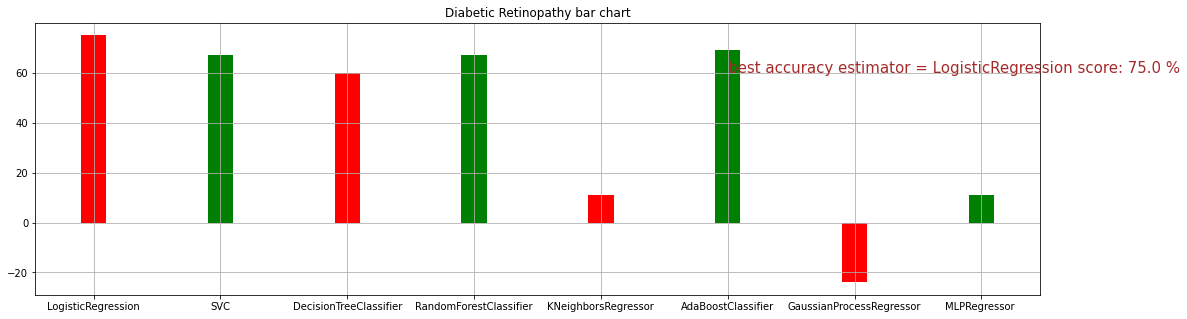

In [217]:
plotBarGraph(diabetic_scores, 'Diabetic Retinopathy bar chart')

# 2) Default of credit card clients

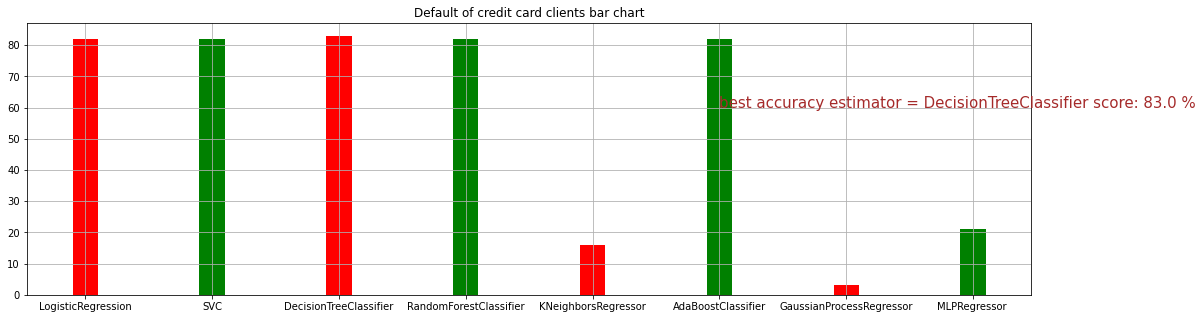

In [218]:
plotBarGraph(credit_scores, 'Default of credit card clients bar chart')

# 3) Breast Cancer Wisconsin

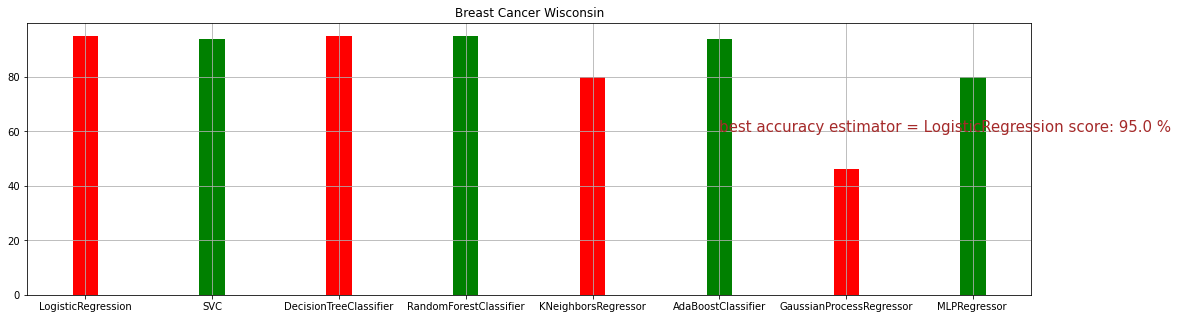

In [219]:
plotBarGraph(breast_scores, 'Breast Cancer Wisconsin')

# 4) Statlog (German credit data)

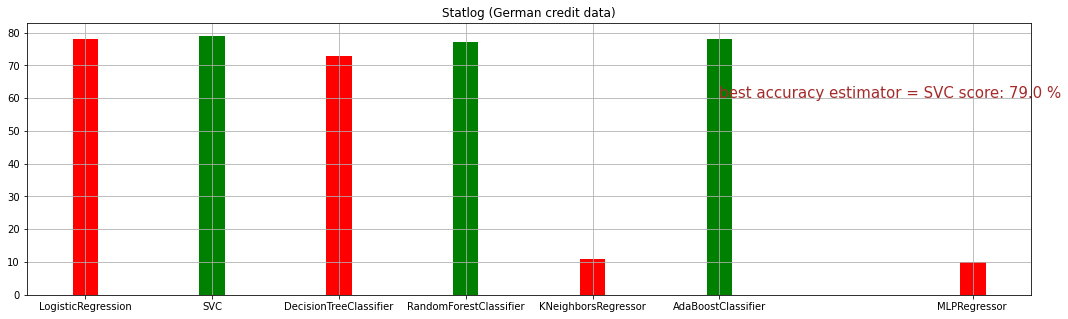

In [220]:
plotBarGraph(german_scores, 'Statlog (German credit data)')

# 5) Adult

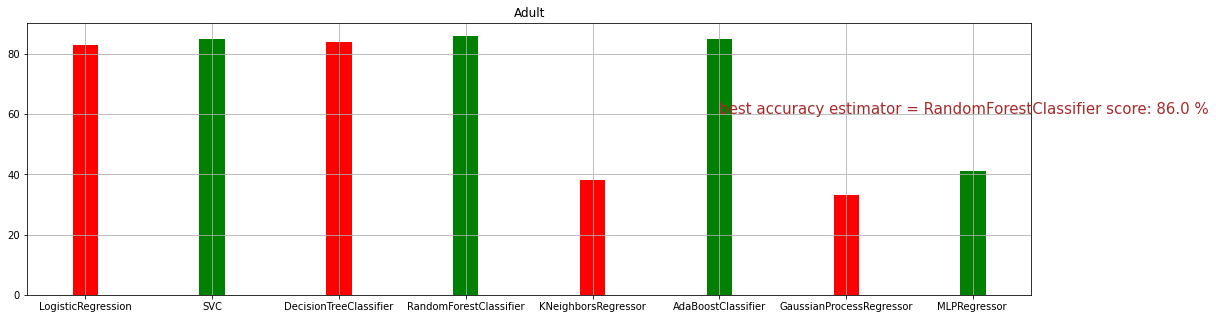

In [221]:
plotBarGraph(adult_scores, 'Adult')

# 6) Yeast

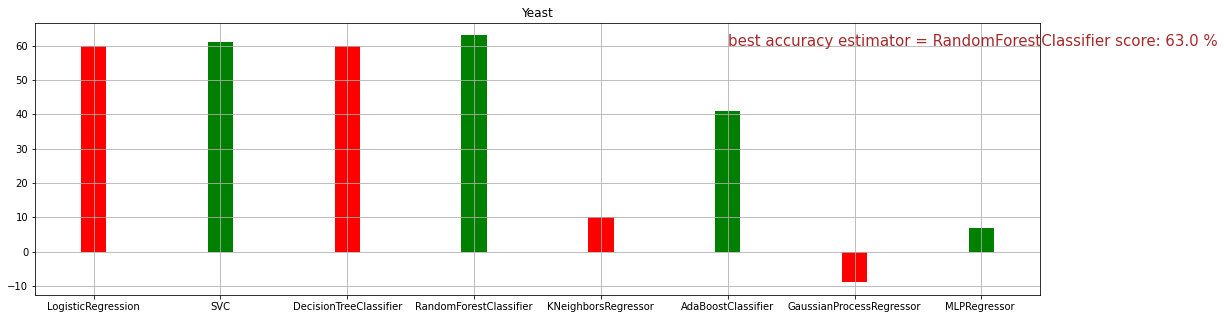

In [222]:
plotBarGraph(yeast_scores, 'Yeast')

# 7) Thoracic Surgery Data

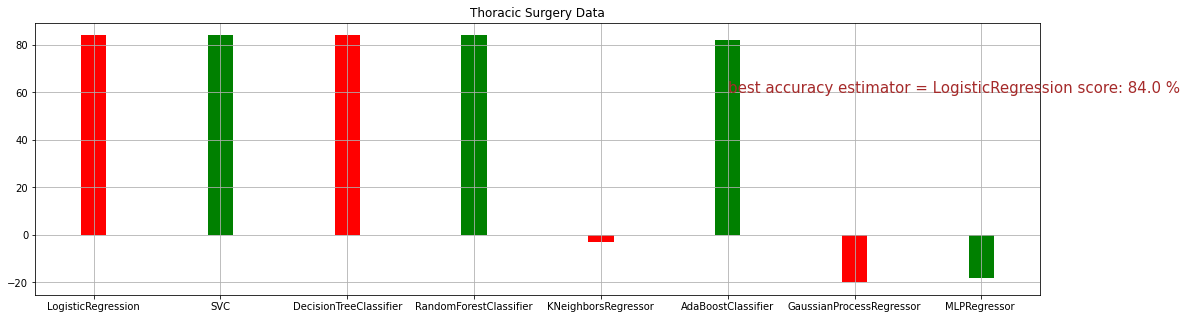

In [223]:
plotBarGraph(thoracic_scores, 'Thoracic Surgery Data')

# 8) Seismic-Bumps

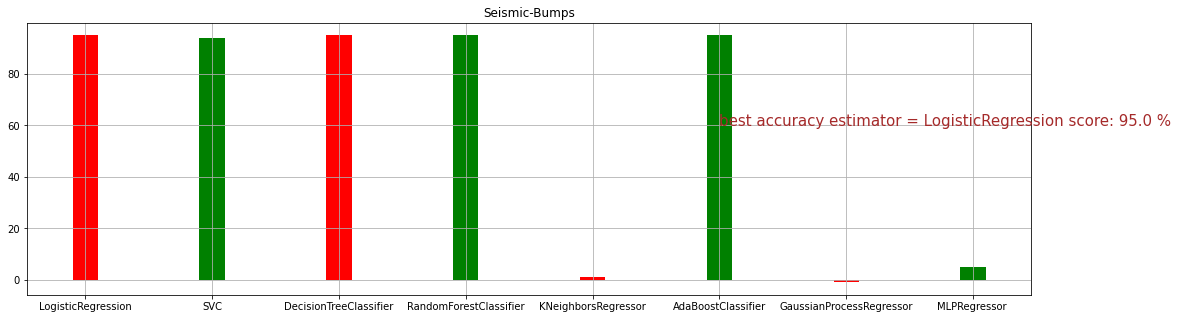

In [224]:
plotBarGraph(seismic_scores, 'Seismic-Bumps')